# Random Number Statistics

## Probability of single non-apocalyptic number

Consider the case of a base-10 random number of $l$ digits. Every digit is randomly selected in the range $[0,9]$.

The probability of a specific series of digits, length $n$, arising is $10^{-n}$. There are $l-n+1$ opportunities to make a match.

The probability to *not match* each time is $1-10^{-n}$. Therefore the probability to not match anywhere in this number is

$$(1-10^{-n})^{l-n+1}$$

Generalising this to base-b:

- Probability of a specific $n$ digit series is $b^{-n}$
- Probability to not match is $1-b^{-n}$
- Number of opportunities to match $l-n+1$
- Probability of not matching

$$(1-b^{-n})^{l-n+1}$$

With $p=1$ for $l<n$

## Expected number of non-apocalyptic numbers

Standard result for sum to $\infty$ is:

$$ \sum_{n=1}^{\infty} \epsilon^n = - \frac{\epsilon}{\epsilon-1} $$

So the total sum for $n$ and $l$ gives the expected number of non-apocalyptic numbers when matching against a random sequence of numbers in base $b$, with a single number of each digit length $l$, for $l \in \mathbb{N}$:

$$ m(n,b) = n-1 + \frac{1-b^{-n}}{b^{-n}} $$

### Example

For 3 digit matches in base 10:

$$ m(3,10) = 2 + \frac{0.999}{0.001} = 1001 $$

### Correction for $p^n$ numbers

When the digit sequences are generated from $p^n$ for $n \in \mathbb{N}$, there will be a different distribution of numbers that are sampled from - e.g., powers of 2 will give more $l$ digit decimals.

The correction factor will be

$$ c(p, b) =  \frac{\log b }{\log p} $$

e.g., for the case of $2^n$ represented in base 10

$$ c(2, 10) = \frac{\log 10}{\log 2} \approx 3.32193 $$

Then, modifying $m(n,b)$ for a different base $p$:

$$ m'(n,b,p) = \left( n-1 + \frac{1-b^{-n}}{b^{-n}} \right) \frac{\log b }{\log p} $$

### (Non-)Apocalyptic Numbers

For the case of $p=2$, $b=10$ and $n=3$:

$$m'(n=3,b=10,p=2) \approx 3325.25$$

![Non-apocalyptic matches 2^n, base 10, 3-digit matches](non-apocalyptic-matches-v2-base-10-power-2-seq-3-n1-63992.png)

$2^n$ does **not** result in a random sequence, but it's close enough to randomised digits (for all except the $NNN$ matches) so the statistical random non-matches do come close to the actual non-apocalypse sequence counts.

## Numerical Calculations (not using the known summation)

Take the specific example of a 3-digit match. Then the probability of a number of $l$ digits not matching is:

In [2]:
function non_match(l; n=3)
    (l < n) && return 1.0
    (1.0 - 10.0^(-n))^(l+1-n)
end

non_match (generic function with 1 method)

In [3]:
for l in [1, 3, 10, 50, 100, 500, 1_000, 5_000, 10_000, 50_000, 100_000, 100_001, 500_000, 1_000_000]
    println("p($l) -> $(non_match(l))")
end

p(1) -> 1.0
p(3) -> 0.999
p(10) -> 0.992027944069944
p(50) -> 0.9531108968798943
p(100) -> 0.9066044494080757
p(500) -> 0.607593524316293
p(1000) -> 0.36843192017940235
p(5000) -> 0.006734574374039293
p(10000) -> 4.5263828369959795e-5
p(50000) -> 1.8848653148880386e-22
p(100000) -> 3.5456153734747036e-44
p(100001) -> 3.542069758101229e-44
p(500000) -> 5.558812362627309e-218
p(1000000) -> 0.0


Note that $p(1\,000\,000)$ is so small it cannot be represented as a `Float64`!

## Probability of all matches above a certain value

Now, what is the probability that above some $l_{min}$ that every random number *does* contain a match for a particular string?

Here we can use the partial sum formula:

$$ \sum_{n=1}^{k} \epsilon^n = \frac{\epsilon (\epsilon^k - 1)}{\epsilon-1} $$

Hence

$$ \sum_{n=l_{min}}^{\infty} \epsilon^n =  - \frac{\epsilon}{\epsilon-1} - \frac{\epsilon (\epsilon^{l_{min}-1} - 1)}{\epsilon-1} $$

$$ =  - \frac{-\epsilon - \epsilon (\epsilon^{l_{min}-1} - 1)}{\epsilon-1} $$

$$ = \frac{-\epsilon - \epsilon^{l_{min}} + \epsilon}{\epsilon-1} $$

$$ = \frac{\epsilon^{l_{min}}}{1-\epsilon} $$

This is the expected number of matches for all $n \geq l_{min}$.

Recall that $\epsilon = (1 - b^{-n})$, hence

$$ m_{l_{min}}(n, b) = \frac{(1 - b^{-n})^{l_{min}}}{b^{-n}} $$

With the additional correction for number base we have:

$$ m'_{l_{min}}(n,b,p) =  \left( \frac{(1 - b^{-n})^{l_{min}}}{b^{-n}} \right ) \frac{\log b }{\log p} $$

N.B. note that $l_{min}$ is the digit length in base $b$, not in base $p$!

In [4]:
"""
Calculate number of non-matches above a digit length l_min:

n = sequence length to match
b = number base of resulting numbers
p = power used to generate numbers
l_min = minimum digit length (in base b)
p_min = minimum power, p^p_min for digit sequences

Either l_min is given or p_min, not both!
"""
function m_l_min(;n, b, p=nothing, l_min=nothing, p_min=nothing)
    if !isnothing(p)
        correction = log(b)/log(p)
    else
        correction = 1.0
    end
    if !isnothing(p_min)
        if !isnothing(l_min)
            throw(ArgumentError("Cannot give p_min and l_min"))
        end
        l_min = p_min / correction
    end
    b_n = float(b)^-n
    (1 - b_n)^l_min * correction / b_n
end

m_l_min

In [5]:
m_l_min(n=3, b=10, p=2, l_min=29784)

3.800944693165505e-10

For random digit strings, how many non-matches for $666$ would we expect statistically above the highest known non-matching power, $p_{min}=29784$?

In [6]:
m_l_min(n=3, b=10, p=2, p_min=29784+1)

0.42216296934241265

So searching from there to infinity, there's only a ~50% chance of finding a match

Now, in fact it's pretty fast to sweep up to, say, 129785 (using `limit-search.jl`) and find zero additional non-matches above $p_{min}=29784$, so from there to $\infty$...

In [7]:
m_l_min(n=3, b=10, p=2, p_min=129785)

3.5105275932539506e-14

So the chances of getting a match, even going to $\infty$ are now extremely small! It's no proof, but it's a strong indication that no further non-matches will be found.

Going even a bit further...

In [8]:
m_l_min(n=3, b=10, p=2, p_min=229785)

2.919205349108113e-27

Looking at 5 digit sequences, current search has reached 4_500_000, so then the match probability is

In [14]:
m_l_min(n=5, b=10, p=2, p_min=4_500_000)

0.43476626844483507

### How low to go?

Try to estimate the point at which no more non-matches will be found for a particular set of parameters.

Plot:

- The expected number of matches above an $l_{min}$ values
- The reciprocal of the total number of match sequences ($=b^{-n}$)

Where these curves intersect, there's only ~1 more match going to be found up to $\infty$, thus a *safety factor* search should stop at around this value

Specifically, for searching $2^n$ in decimal representation for 5-digit sequences:

In [22]:
using Plots
using LaTeXStrings

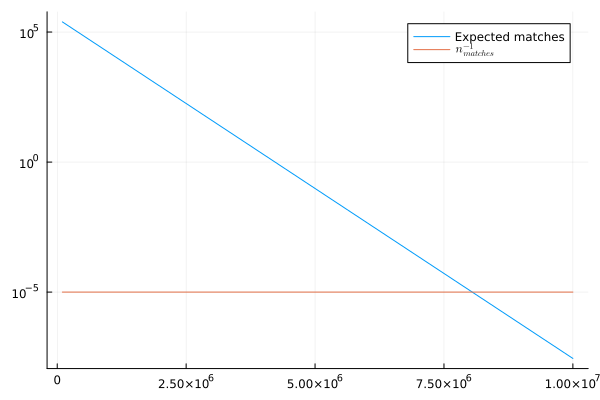

In [25]:
p_min_seq=collect(100_000:100_000:10_000_000)
my_m_l_min(pmin) = m_l_min(n=5, b=10, p=2, p_min=pmin)
m_l_min_seq = my_m_l_min.(p_min_seq)
plot(p_min_seq, m_l_min_seq, yaxis=:log, label="Expected matches")
pn_matches = 1.0/10^5
plot!([p_min_seq[begin], p_min_seq[end]], [pn_matches, pn_matches], label=L"$n_{matches}^{-1}$")

So expect to stop at around 8 million!